### Kindle Review Sentiment Analysis

Columns:: 

asin - ID of the product, like B000FA64PK

helpful - helpfulness rating of the review - example: 2/3.
 
overall - rating of the product.
    
reviewText - text of the review (heading).
    
reviewTime - time of the review (raw).
    
reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
    
reviewerName - name of the reviewer.
    
summary - summary of the review (description).
    
unixReviewTime - unix timestamp.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
data = pd.read_csv("kindle_reviews.csv")
data.head(10)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
5,5,B000F83SZQ,"[0, 0]",4,A beautiful in-depth character description mak...,"05 26, 2014",A1RK2OCZDSGC6R,ubavka seirovska,Review,1401062400
6,6,B000F83SZQ,"[0, 0]",4,I enjoyed this one tho I'm not sure why it's c...,"06 10, 2014",A2HSAKHC3IBRE6,Wolfmist,Nice old fashioned story,1402358400
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400
8,8,B000FA64PA,"[0, 0]",5,Darth Maul working under cloak of darkness com...,"10 11, 2013",A1UG4Q4D3OAH3A,dsa,Darth Maul,1381449600
9,9,B000FA64PA,"[0, 0]",4,This is a short story focused on Darth Maul's ...,"02 13, 2011",AQZH7YTWQPOBE,Enjolras,"Not bad, not exceptional",1297555200


In [3]:
data.shape

(982619, 10)

In [4]:
df = data[['reviewText','overall']]

In [5]:
df.head()

,reviewText,overall
0,I enjoy vintage books and movies so I enjoyed ...,5
1,This book is a reissue of an old one; the auth...,4
2,This was a fairly interesting read. It had ol...,4
3,I'd never read any of the Amy Brewster mysteri...,5
4,"If you like period pieces - clothing, lingo, y...",4


In [6]:
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'cardinality': df.nunique(),
              'duplicated':df.duplicated().sum(),
              'datatype':df.dtypes
             })


,count,nulls,nulls%,cardinality,duplicated,datatype
reviewText,982619,22,0.002239,982267,297,object
overall,982619,0,0.000000,5,297,int64


In [7]:
## Rename column name
df.rename(columns = {'overall':'rating'},inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982619 entries, 0 to 982618
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewText  982597 non-null  object
 1   rating      982619 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.0+ MB


In [8]:
## Drop All Duplicate Records
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
## Drop Rows with Any NaN Value
df = df.dropna()

In [10]:
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'cardinality': df.nunique(),
              'duplicated':df.duplicated().sum(),
              'datatype':df.dtypes
             })

,count,nulls,nulls%,cardinality,duplicated,datatype
reviewText,982319,0,0.0,982267,0,object
rating,982319,0,0.0,5,0,int64


In [11]:
df['rating'].value_counts()

rating
5    575031
4    253959
3     96181
2     34130
1     23018
Name: count, dtype: int64

In [12]:
## 1 for Positive Review and 0 for Negative Review
df['rating'] = df['rating'].apply(lambda x:0 if x<3 else 1)

In [13]:
df['rating'].value_counts()

rating
1    925171
0     57148
Name: count, dtype: int64

In [14]:
# Assume df is your original DataFrame with 1 million records
df_sampled = df.sample(n=12000, random_state=42)  # random_state ensures reproducibility

# Display the sampled data
print(df_sampled.head())

                                               reviewText  rating
329777  Here is a fantastic mind bender! I loved it! H...       1
119103  I've long liked this author's novels about Lou...       1
538092  I haven't read a book this good in ages!!! Ms....       1
739558                 Another great Miz Scarlet mystery!       1
772756  I wasn't sure from some of the comments whethe...       1


In [15]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 329777 to 393185
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  12000 non-null  object
 1   rating      12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 281.2+ KB


In [16]:
df_sampled['rating'].value_counts()

rating
1    11353
0      647
Name: count, dtype: int64

### Data Preprocessing and Cleaning

In [17]:
import re
import string
#import emoji
import contractions
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize resources
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_column(df, column_name):
    
    def preprocess_text(text):
        # Lowercase text
        text = text.lower()
        
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text.strip())
        
        # Remove special characters and numbers
        text = re.sub(r'[^a-z A-Z\s]', '', text)
        text = re.sub(r'\d+', '', text)
        
        # Remove URLs
        text = re.sub(r'http\S+|www\S+', '', text)
        
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Spelling correction
        #text = str(TextBlob(text).correct())
        
        # Replace emojis with text descriptions
        #text = emoji.demojize(text)
        
        # Handle contractions
        text = contractions.fix(text)
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        
        return ' '.join(tokens)

    # Apply the preprocessing function to the specified column
    return df_sampled['reviewText'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df_sampled['cleaned_reviewText'] = clean_text_column(df_sampled, 'reviewText')

In [20]:
df_sampled.head()

,reviewText,rating,cleaned_reviewText
329777,Here is a fantastic mind bender! I loved it! H...,1,fantastic mind bender loved hope take time rea...
119103,I've long liked this author's novels about Lou...,1,long liked author novel louisiana since grew l...
538092,I haven't read a book this good in ages!!! Ms....,1,read book good age m goodwin new fan loved sto...
739558,Another great Miz Scarlet mystery!,1,another great miz scarlet mystery
772756,I wasn't sure from some of the comments whethe...,1,sure comment whether wanted read book glad lov...


In [21]:
df_sampled.drop(["reviewText"], axis = 1, inplace = True)

In [22]:
df_sampled.head()

,rating,cleaned_reviewText
329777,1,fantastic mind bender loved hope take time rea...
119103,1,long liked author novel louisiana since grew l...
538092,1,read book good age m goodwin new fan loved sto...
739558,1,another great miz scarlet mystery
772756,1,sure comment whether wanted read book glad lov...


In [25]:
# Train Test Split of the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sampled['cleaned_reviewText'],df_sampled['rating'], test_size=0.20, random_state=42, shuffle=True)

X_train.shape,X_test.shape,y_train.shape, y_test.shape

((9600,), (2400,), (9600,), (2400,))

### Sentence to Vector Conversion (Text Vectorization)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#  Vectorize the text data using CountVectorizer (Bag of Words)
bow_vectorizer = CountVectorizer(stop_words='english', max_features=5000)  # Limit to top 5000 features
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Vectorize the text data using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to top 5000 features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print shape of the training and testing datasets
print("Train shape:", X_train_bow.shape, X_train_tfidf.shape)
print("Test shape:", X_test_bow.shape, X_test_tfidf.shape)

Train shape: (9600, 5000) (9600, 5000)
Test shape: (2400, 5000) (2400, 5000)


### Model Training (Random Forest Classifier)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline for model training and evaluation with Random Forest and BOW
bow_pipeline = Pipeline([
    ('vectorizer', bow_vectorizer),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))  # Random Forest with class_weight='balanced'
])

# Fit the model on the training data (BOW)
bow_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_bow = bow_pipeline.predict(X_test)

In [29]:
# Create a pipeline for model training and evaluation with Random Forest and TF-IDF
tfidf_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))  # Random Forest with class_weight='balanced'
])

# Fit the model on the training data (TF-IDF)
tfidf_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_tfidf = tfidf_pipeline.predict(X_test)


### Evaluation of the Model

BOW + Random Forest Model Evaluation:
----------------------------------------
Accuracy (BOW): 0.9470833333333334

Classification Report (BOW):
               precision    recall  f1-score   support

           0       0.69      0.07      0.12       132
           1       0.95      1.00      0.97      2268

    accuracy                           0.95      2400
   macro avg       0.82      0.53      0.55      2400
weighted avg       0.93      0.95      0.93      2400



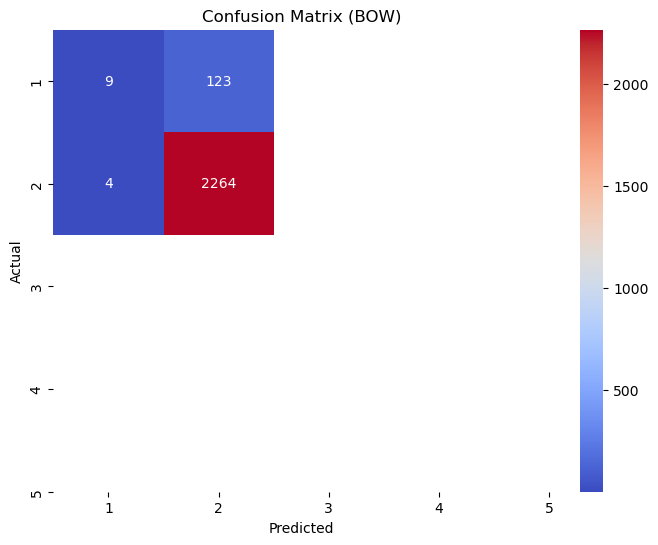


TF-IDF + Random Forest Model Evaluation:
-------------------------------------------
Accuracy (TF-IDF): 0.945

Classification Report (TF-IDF):
               precision    recall  f1-score   support

           0       0.50      0.03      0.06       132
           1       0.95      1.00      0.97      2268

    accuracy                           0.94      2400
   macro avg       0.72      0.51      0.51      2400
weighted avg       0.92      0.94      0.92      2400



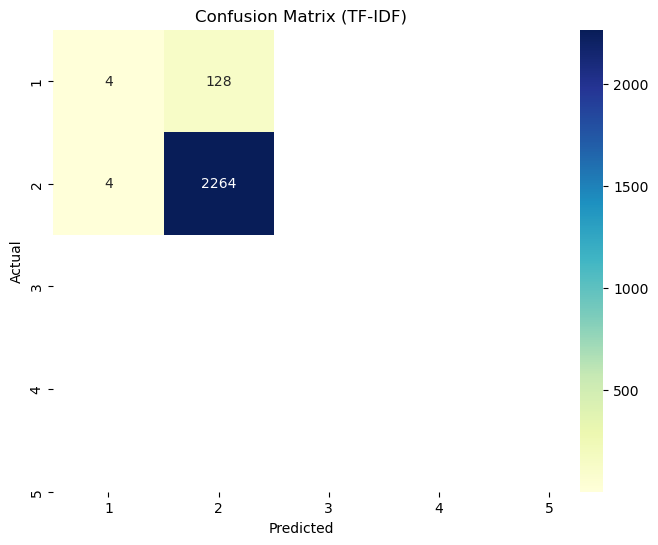

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate BOW Model
print("BOW + Random Forest Model Evaluation:")
print("----------------------------------------")
accuracy_bow = accuracy_score(y_test, y_pred_bow)
conf_matrix_bow = confusion_matrix(y_test, y_pred_bow)
class_report_bow = classification_report(y_test, y_pred_bow)

print("Accuracy (BOW):", accuracy_bow)
print("\nClassification Report (BOW):\n", class_report_bow)

# Visualize Confusion Matrix for BOW
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow, annot=True, fmt='d', cmap='coolwarm', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title("Confusion Matrix (BOW)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluate TF-IDF Model
print("\nTF-IDF + Random Forest Model Evaluation:")
print("-------------------------------------------")
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
class_report_tfidf = classification_report(y_test, y_pred_tfidf)

print("Accuracy (TF-IDF):", accuracy_tfidf)
print("\nClassification Report (TF-IDF):\n", class_report_tfidf)

# Visualize Confusion Matrix for TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='YlGnBu', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title("Confusion Matrix (TF-IDF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Text Vetorization with Word2Vec Model 

In [35]:
from gensim.models import Word2Vec
import numpy as np

# Ensure X_train and X_test are strings and handle missing values
X_train = X_train.fillna("missing").astype(str)
X_test = X_test.fillna("missing").astype(str)

# Tokenize the training and test data
X_train_tokenized = [sentence.split() for sentence in X_train if isinstance(sentence, str) and sentence.strip()]
X_test_tokenized = [sentence.split() for sentence in X_test if isinstance(sentence, str) and sentence.strip()]

# Train the Word2Vec model on the tokenized X_train
vector_size = 100  # Size of Word2Vec vectors
word2vec_model = Word2Vec(sentences=X_train_tokenized, vector_size=vector_size, window=5, min_count=2, sg=1, workers=4, seed=42)

# Function to calculate the document vector
def documents_to_vectors(tokenized_data, model, vector_size):
    document_vectors = []
    for tokens in tokenized_data:
        # Filter words that are in the Word2Vec vocabulary
        word_vectors = [model.wv[word] for word in tokens if word in model.wv]
        if word_vectors:
            # Average word vectors for the document
            document_vectors.append(np.mean(word_vectors, axis=0))
        else:
            # Use a zero vector if no words in the document are in the Word2Vec vocabulary
            document_vectors.append(np.zeros(vector_size))
    return np.array(document_vectors)

# Apply the Word2Vec transformation to X_train and X_test
X_train_word2vec = documents_to_vectors(X_train_tokenized, word2vec_model, vector_size)
X_test_word2vec = documents_to_vectors(X_test_tokenized, word2vec_model, vector_size)

# Display shapes
print("Shape of X_train_word2vec:", X_train_word2vec.shape)
print("Shape of X_test_word2vec:", X_test_word2vec.shape)

Shape of X_train_word2vec: (9600, 100)
Shape of X_test_word2vec: (2400, 100)


### Model Training with Random Forest Classification

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.03      0.06       132
           1       0.95      1.00      0.97      2268

    accuracy                           0.95      2400
   macro avg       0.81      0.51      0.52      2400
weighted avg       0.93      0.95      0.92      2400



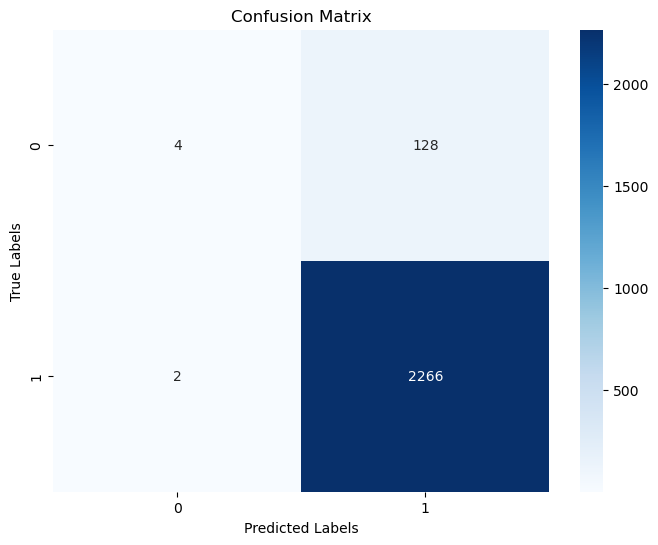

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize RandomForestClassifier with class_weight='balanced'
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    class_weight="balanced",  # Handle class imbalance
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available processors
)

# Fit the model on the Word2Vec-transformed training data
rf_classifier.fit(X_train_word2vec, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test_word2vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
